In [ ]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle


In [ ]:
list_of_images = []
with os.scandir('/content/') as folder:
  for f in folder:
    if f.name.endswith('.jpg'):
      list_of_images.append(f.name)
print(list_of_images)

In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553476096/553467096 [==============================] - 3s 0us/step


In [ ]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    print(features.shape)
    return features

In [ ]:
data = {}
p = r"CHANGE TO A LOCATION TO SAVE FEATURE VECTORS"

In [ ]:
for image in list_of_images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image,model)
        data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

In [ ]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

(120, 4096)

In [ ]:
# use PCA with 100 components
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

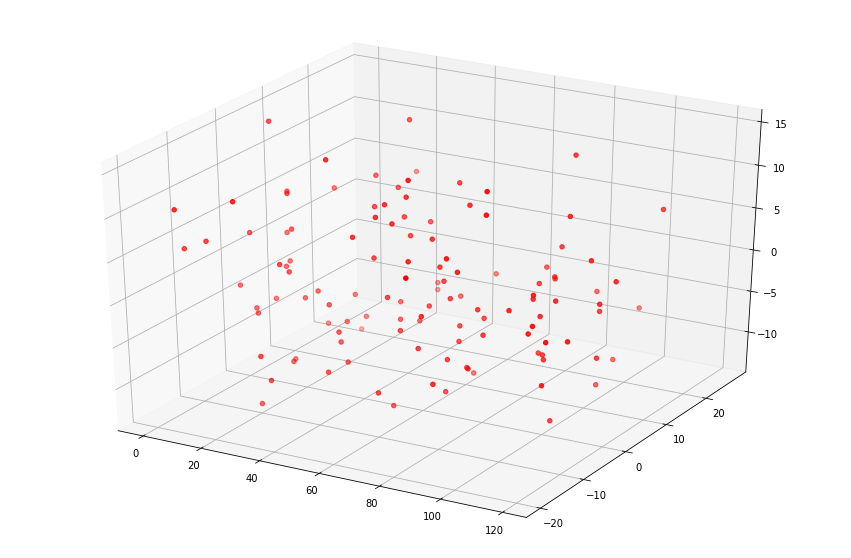

In [ ]:
# try to portray distribution of data using 2 main components
pca1 = PCA(n_components=2)
pca1.fit(feat)
x1 = pca.transform(feat)

x_line = np.linspace(0,119,num=120)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
#ax.view_init(60, 35)
ax.scatter3D(x_line, x1[:,1], x1[:,2], color = 'r')

Text(0, 0.5, 'Sum of squared distance')

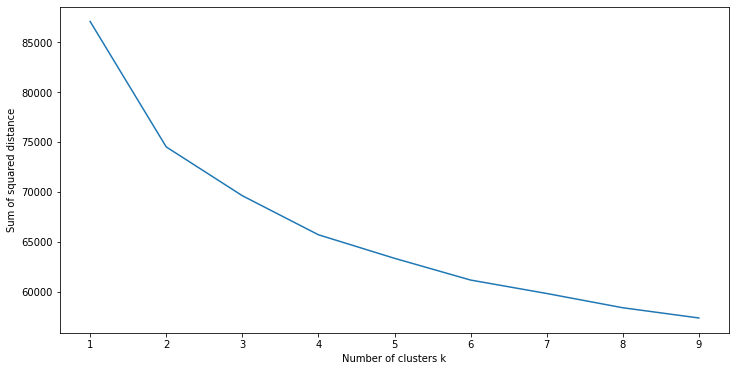

In [ ]:
sse = []
list_k = list(range(1, 10))

# elbow - method
for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(12, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=22)
result = kmeans.fit_predict(x)

In [ ]:
z = zip(list_of_images,result)
labeld_data = dict(z)
# print(labeld_data)
first_cluster = {k: v for k, v in labeld_data.items() if v == 1}
second_cluster = {k: v for k, v in labeld_data.items() if v == 0}
# print(first_cluster)
first_cluster_names = np.array(list(first_cluster.keys()))
second_cluster_names = np.array(list(second_cluster.keys()))

len(second_cluster)

75

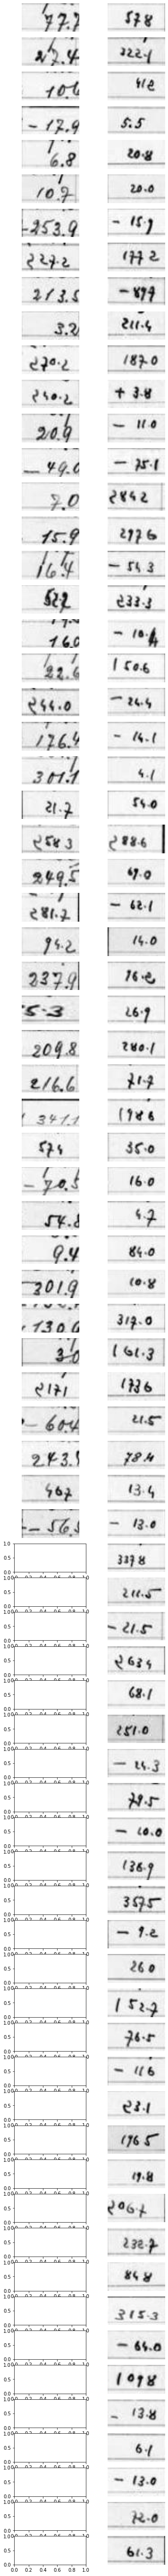

In [ ]:
fig, axes = plt.subplots(max(len(first_cluster_names),len(second_cluster_names)), 2 , figsize=(6,100))

for i in range(len(first_cluster_names)):
  img = load_img(first_cluster_names[i])
  img = np.array(img)
  axes[i,0].imshow(img)
  axes[i,0].axis('off')

for j in range(len(second_cluster_names)):
  img = load_img(second_cluster_names[j])
  img = np.array(img)
  axes[j,1].imshow(img)
  axes[j,1].axis('off')